In [1]:
import torch, torchvision.transforms as T
from torchvision import models
from PIL import Image
import os, glob, pandas as pd, numpy as np, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns
from torchvision.models import alexnet, AlexNet_Weights
from sklearn.decomposition import PCA



ModuleNotFoundError: No module named 'torch'

## alexnet stuff

In [ ]:
# load pretrainded AlexNet model
model = models.alexnet(weights=AlexNet_Weights.DEFAULT).eval()
# remove the last layer to get the feature vector
model.classifier = torch.nn.Sequential(*list(model.classifier.children())[:-1])
# transform the input image to the format expected by the model
transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor(), T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

def get_embeddings(img_path):
    img = transform(Image.open(img_path).convert('RGB')).unsqueeze(0)
    with torch.no_grad():
    # with torch.no_grad() is used to disable gradient calculation
        return model(img)

## get embeddings of stims used in expt

In [40]:
# get list of shapes used as targets
df_trials = pd.read_csv('../input_data/trials.csv')
used_shapes = df_trials['target_file'].unique().tolist()
embeddings = {shape_file: get_embeddings(os.path.join('../', shape_file)) for shape_file in used_shapes}

# convert to df
embeddings_df = pd.DataFrame({k: v.squeeze().numpy() for k, v in embeddings.items()}).T
embeddings_df.columns = [f'feature_{i}' for i in range(embeddings_df.shape[1])]
embeddings_df['shapes'] = embeddings_df.index

# append associated stim & noise positions
df_unique = df_trials.drop_duplicates('target_file')
embeddings_df['stim_file_pos'] = embeddings_df['shapes'].map(df_unique.set_index('target_file')['stim_file_pos'])
embeddings_df['noise_pos'] = embeddings_df['shapes'].map(df_unique.set_index('target_file')['noise_pos'])

# remove features with minimal variance across shapes
feature_cols = [col for col in embeddings_df.columns if col.startswith('feature_')]
variances = embeddings_df[feature_cols].var()
threshold = 0.2
low_variance_features = variances[variances < threshold].index
embeddings_df = embeddings_df.drop(columns=low_variance_features)

embeddings_df.to_csv('../input_data/stimuli_embeddings.csv', index=False)
embeddings_df.head()


,feature_38,feature_45,feature_47,feature_52,feature_60,feature_88,feature_89,feature_95,feature_116,feature_122,...,feature_4058,feature_4062,feature_4068,feature_4072,feature_4073,feature_4076,feature_4091,shapes,stim_file_pos,noise_pos
input_data/stims/Shape_0.10_1.00.png,0.0,4.321363,0.265194,10.104386,6.563838,0.897169,5.857169,1.158515,5.860164,1.405257,...,5.845685,1.352017,0.0,2.771215,5.519980,0.293256,0.0,input_data/stims/Shape_0.10_1.00.png,0.1,1.0
input_data/stims/Shape_0.30_1.00.png,0.0,5.103434,0.098387,10.506262,6.886871,0.451989,6.409010,1.470702,5.752965,1.042045,...,6.205308,1.119536,0.0,2.433506,5.862867,0.000000,0.0,input_data/stims/Shape_0.30_1.00.png,0.3,1.0
input_data/stims/Shape_0.50_1.00.png,0.0,5.420556,0.012232,10.232824,7.231483,1.283350,5.765145,1.846947,5.165256,0.452337,...,6.721251,0.987496,0.0,1.914771,5.642951,0.686272,0.0,input_data/stims/Shape_0.50_1.00.png,0.5,1.0
input_data/stims/Shape_0.70_1.00.png,0.0,5.767001,0.438082,10.187008,7.486193,1.163719,5.596732,1.838274,4.851444,0.393556,...,6.785083,0.970008,0.0,1.929549,5.647951,2.018793,0.0,input_data/stims/Shape_0.70_1.00.png,0.7,1.0
input_data/stims/Shape_0.90_1.00.png,0.0,6.028572,0.982878,10.275951,7.316341,1.476014,5.438329,1.699836,4.732298,0.126166,...,6.562957,1.051322,0.0,2.520689,5.349232,1.902938,0.0,input_data/stims/Shape_0.90_1.00.png,0.9,1.0


## plot stim embeddings

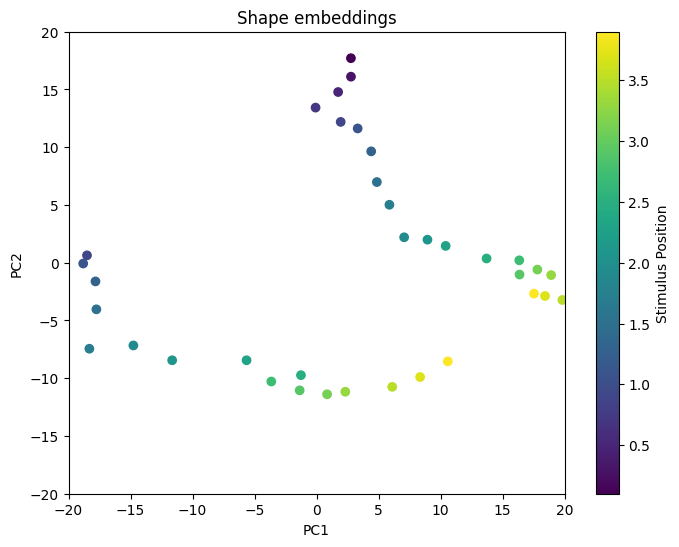

In [72]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_df.drop(columns=['shapes', 'stim_file_pos', 'noise_pos']))
reduced_embeddings_df = pd.DataFrame(reduced_embeddings, columns=['PC1', 'PC2'])

reduced_embeddings_df['stim_file_pos'] = embeddings_df['stim_file_pos'].values
reduced_embeddings_df['noise_pos'] = embeddings_df['noise_pos'].values
reduced_embeddings_df.head()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_embeddings_df['PC1'], reduced_embeddings_df['PC2'], c=reduced_embeddings_df['stim_file_pos'])
# scatter = plt.scatter(reduced_embeddings_df['PC1'], reduced_embeddings_df['PC2'], c=reduced_embeddings_df['noise_pos'])
plt.colorbar(scatter, label='Stimulus Position')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title('Shape embeddings')
plt.show()


## building architecture

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ShapeSideNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ShapeSideNN, self).__init__()
        
        # single intermediate layer
        self.hidden = nn.Linear(input_dim, hidden_dim)
        
        # separate outputs
        self.reconstruction_output = nn.Linear(hidden_dim, output_dim)
        self.classification_output = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        
        # output for reconstruction (continuous)
        reconstruction = self.reconstruction_output(x)
        
        # output for classification (binary)
        classification = torch.sigmoid(self.classification_output(x))
        
        return reconstruction, classification

# example initialization
input_dim = 406
hidden_dim = 128
output_dim = 406
model = ShapeSideNN(input_dim, hidden_dim, output_dim)
print(model)


ShapeSideNN(
  (hidden): Linear(in_features=406, out_features=128, bias=True)
  (reconstruction_output): Linear(in_features=128, out_features=406, bias=True)
  (classification_output): Linear(in_features=128, out_features=1, bias=True)
)
